# `ApJdataFrames` 
Shetrone et al. 2015  
---
`Title`: THE SDSS-III APOGEE SPECTRAL LINE LIST FOR H-BAND SPECTROSCOPY  
`Authors`: M Shetrone, D Bizyaev, J E Lawler, C Allende Prieto, J A Johnson, V V Smith, K Cunha, J. Holtzman, A E García Pérez, Sz Mészáros, J Sobeck, O Zamora, D A Garcia Hernandez, D Souto, D Chojnowski, L Koesterke, S Majewski, and G Zasowski

Data is from this paper:  
http://iopscience.iop.org/0067-0049/221/2/24/



In [1]:
import pandas as pd

In [2]:
from astropy.io import ascii, votable, misc

### Download Data

In [16]:
#! mkdir ../data/Shetrone2015
#! wget http://iopscience.iop.org/0067-0049/221/2/24/suppdata/apjs521087t7_mrt.txt
#! mv apjs521087t7_mrt.txt ../data/Shetrone2015/
#! du -hs ../data/Shetrone2015/apjs521087t7_mrt.txt

The file is about 24 MB.

### Data wrangle-- read in the data

In [19]:
dat = ascii.read('../data/Shetrone2015/apjs521087t7_mrt.txt')

In [20]:
! head ../data/Shetrone2015/apjs521087t7_mrt.txt

In [29]:
dat.info

//anaconda/lib/python3.4/site-packages/astropy/table/column.py:268: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self.data.__eq__(other)


<Table masked=True length=134457>
  name   dtype    unit                        description                       n_bad 
------- ------- ------- ------------------------------------------------------- ------
   Wave float64      nm                                       Vacuum wavelength      0
  orggf float64     [-]                                  Original log(gf) value     91
  newgf float64     [-]               Improved literature or laboratory log(gf) 128646
e_newgf float64     [-]                          Error in newgf, when available 133961
r_newgf    str3                                                Source for newgf 128664
  astgf float64     [-]                                   Astrophysical log(gf) 131405
r_astgf    str3                                              Source for astrogf 131405
 specid float64                                              Species identifier      0
    EP1 float64  1 / cm                                      Lower Energy Level      0
     J1 f

In [22]:
df = dat.to_pandas()

In [23]:
df.head()

,Wave,orggf,newgf,e_newgf,r_newgf,astgf,r_astgf,specid,EP1,J1,...,F0,F1,Note1,S,F2,note2,g1,g2,vdWorg,vdWast
0,1500.4148,-0.696,NaN,NaN,NaN,-2.696,Sv5,26.00,52049.820,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1570.0,1201.0,RAD,-6.43
1,1500.4157,-3.734,NaN,NaN,NaN,NaN,NaN,607.12,35901.223,7.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1500.4177,-1.672,NaN,NaN,NaN,-3.672,Sv5,28.00,51124.800,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1084.0,1059.0,RAD,NaN
3,1500.4184,-1.460,NaN,NaN,NaN,NaN,NaN,606.13,29732.079,132.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1500.4184,-4.179,NaN,NaN,NaN,NaN,NaN,607.13,28928.513,63.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.columns

Index(['Wave', 'orggf', 'newgf', 'e_newgf', 'r_newgf', 'astgf', 'r_astgf',
       'specid', 'EP1', 'J1', 'EP1id', 'EP2', 'J2', 'EP2id', 'Rad', 'Sta',
       'vdW', 'unlte', 'lnlte', 'iso1', 'hyp', 'iso2', 'isof', 'hE1', 'hE2',
       'F0', 'F1', 'Note1', 'S', 'F2', 'note2', 'g1', 'g2', 'vdWorg',
       'vdWast'],
      dtype='object')

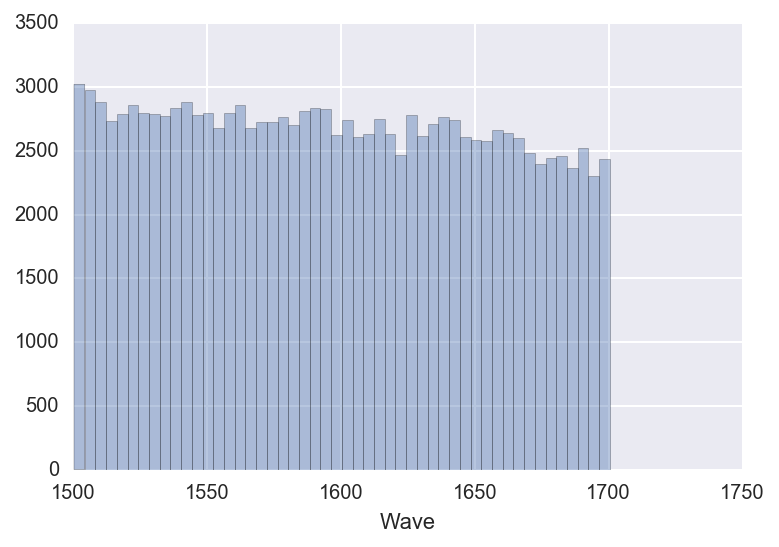

In [69]:
sns.distplot(df.Wave, norm_hist=False, kde=False)

In [27]:
df.count()

Wave       134457
orggf      134366
newgf        5811
e_newgf       496
r_newgf      5793
astgf        3052
r_astgf      3052
specid     134457
EP1        134457
J1         134457
EP1id      134219
EP2        134457
J2         134457
EP2id      134218
Rad         12080
Sta         12070
vdW         14137
unlte       11782
lnlte       11782
iso1        11842
hyp         11828
iso2        11851
isof        11805
hE1         11782
hE2         11782
F0           2183
F1           2183
Note1         783
S            2183
F2           2183
note2        1470
g1          11795
g2          11795
vdWorg      12000
vdWast        776
dtype: int64

//anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


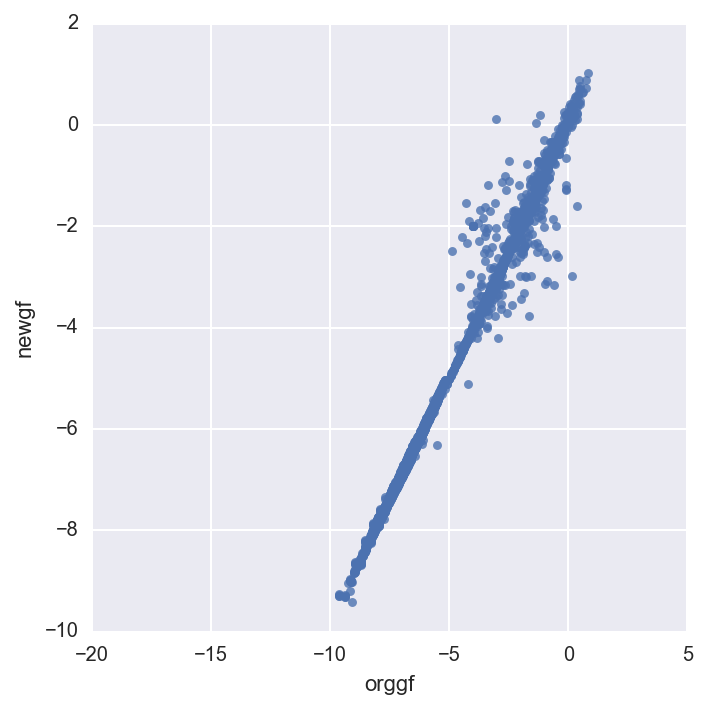

In [34]:
sns.lmplot('orggf', 'newgf', df, fit_reg=False)

In [36]:
from astropy import units as u

In [37]:
u.cm

Unit("cm")

In [49]:
EP1 = df.EP1.values*1.0/u.cm
EP2 = df.EP2.values*1.0/u.cm

In [50]:
EP1_eV = EP1.to(u.eV, equivalencies=u.equivalencies.spectral())
EP2_eV = EP2.to(u.eV, equivalencies=u.equivalencies.spectral())

In [51]:
deV = EP1_eV - EP2_eV

//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


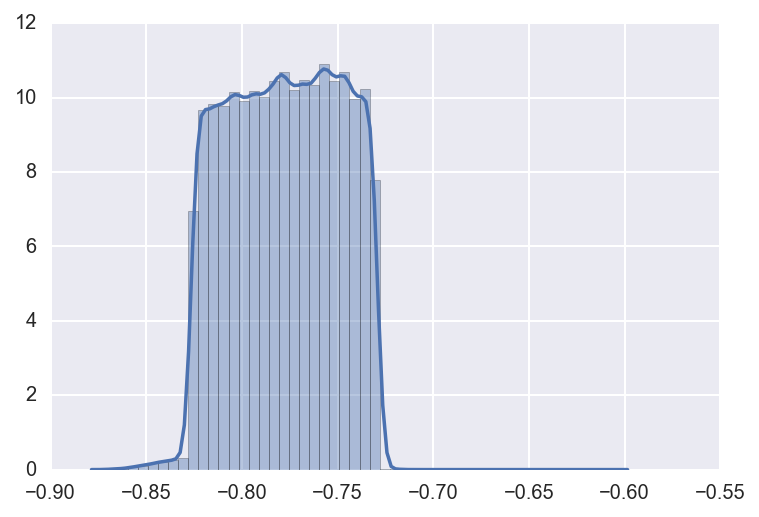

In [52]:
sns.distplot(deV)

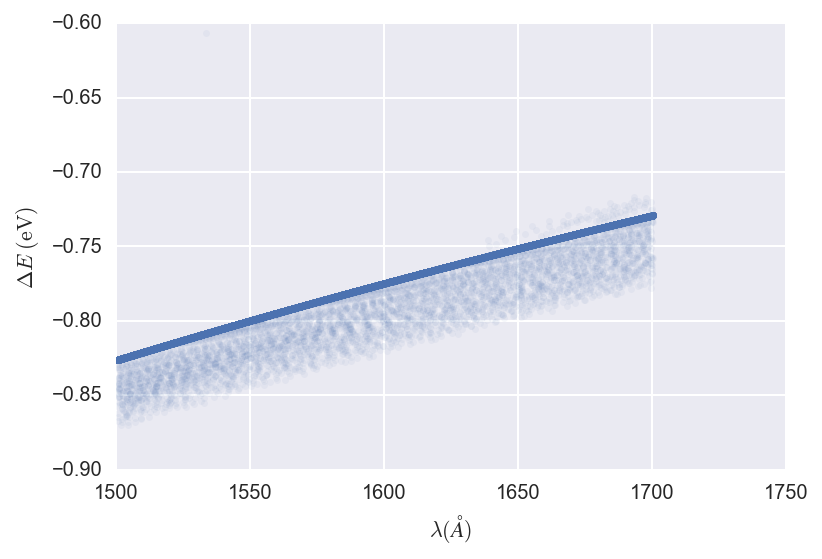

In [67]:
plt.plot(df.Wave, deV, '.', alpha=0.05)
plt.xlabel('$\lambda (\AA)$')
plt.ylabel('$\Delta E \;(\mathrm{eV})$')

There are finite differences between the difference in the energy levels and the emitted wavelength based on other properties of the transition.

## The end.